In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from funcs import clean_column_names

ImportError: attempted relative import with no known parent package

In [2]:
gatec = pd.read_excel('../sample_data/gatec.xlsx')

In [3]:
gatec = gatec.convert_dtypes()
gatec.columns = clean_column_names(gatec.columns)

In [4]:
columns_to_select = [
    'cod_fazenda',
    'area_(ha)',
    'producao_(t)',
    'dist_(km)',
    'atr'
]

In [5]:
select_gatec = gatec[columns_to_select]

In [6]:
df_fazendas = select_gatec.groupby('cod_fazenda', as_index=False).agg({'area_(ha)': 'sum', 'producao_(t)': 'sum', 'dist_(km)': 'first', 'atr': 'first'})

In [7]:
df_fazendas['produtividade_(ton/ha)'] = df_fazendas.apply(lambda x: x['producao_(t)'] / x['area_(ha)'], axis=1)

In [8]:
df_fazendas['latitude'] = np.random.randint(14, 22, size=len(df_fazendas)) + np.random.rand(len(df_fazendas))
df_fazendas['longitude'] = np.random.randint(42, 48, size=len(df_fazendas)) + np.random.rand(len(df_fazendas))

In [9]:
X_all = df_fazendas.drop('cod_fazenda', axis=1).values
X_atr = df_fazendas[['atr']].values
X_dist = df_fazendas[['dist_(km)']].values
X_atr_dist = df_fazendas[['atr', 'dist_(km)']].values
X_local = df_fazendas[['latitude', 'longitude']].values


In [10]:
model = KMeans(n_clusters=10)

df_fazendas['grupo_geral'] = model.fit_predict(X_all)
df_fazendas['grupo_atr'] = model.fit_predict(X_atr)
df_fazendas['grupo_dist'] = model.fit_predict(X_dist)
df_fazendas['grupo_atr_dist'] = model.fit_predict(X_atr_dist)
df_fazendas['grupo_local'] = model.fit_predict(X_local)

In [11]:
df_fazendas.head()

,cod_fazenda,area_(ha),producao_(t),dist_(km),atr,produtividade_(ton/ha),latitude,longitude,grupo_geral,grupo_atr,grupo_dist,grupo_atr_dist,grupo_local
0,7,10.42,907.582,8.0,150.773056,87.100000,19.554615,43.738964,8,4,9,0,2
1,8,10.05,777.87,6.0,151.808452,77.400000,17.698471,45.029936,8,8,9,0,3
2,9,79.14,4165.8,18.0,150.07958,52.638362,21.464548,44.664294,7,4,5,6,7
3,10,39.87,2699.199,6.0,146.631468,67.700000,16.713224,44.783917,3,2,9,0,1
4,11,48.46,4677.955,3.0,121.2522,96.532295,15.065711,44.244435,7,3,9,5,1


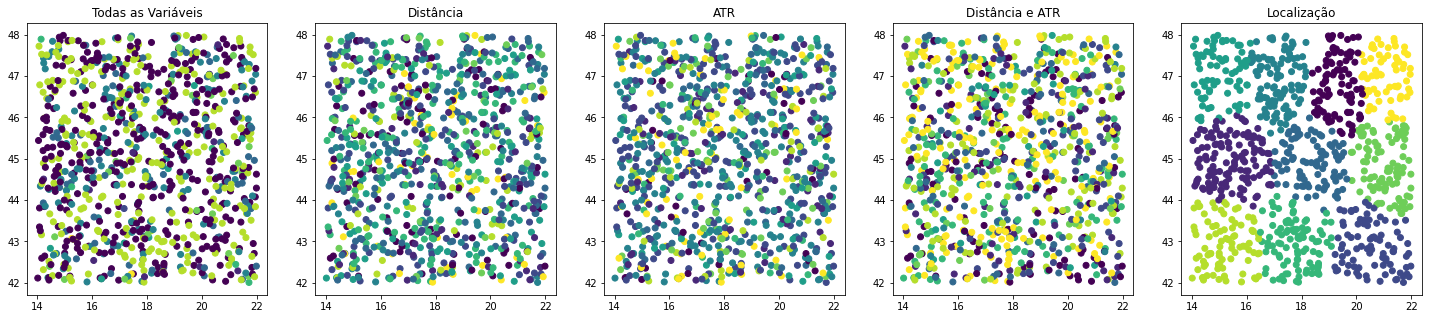

In [13]:
plt.figure(figsize=(25,5))

plt.subplot(1, 5, 1)
plt.scatter(x=df_fazendas['latitude'], y=df_fazendas['longitude'], c=df_fazendas['grupo_geral'])
plt.title('Todas as Variáveis')

plt.subplot(1, 5, 2)
plt.scatter(x=df_fazendas['latitude'], y=df_fazendas['longitude'], c=df_fazendas['grupo_dist'])
plt.title('Distância')

plt.subplot(1, 5, 3)
plt.scatter(x=df_fazendas['latitude'], y=df_fazendas['longitude'], c=df_fazendas['grupo_atr'])
plt.title('ATR')

plt.subplot(1, 5, 4)
plt.scatter(x=df_fazendas['latitude'], y=df_fazendas['longitude'], c=df_fazendas['grupo_atr_dist'])
plt.title('Distância e ATR')

plt.subplot(1, 5, 5)
plt.scatter(x=df_fazendas['latitude'], y=df_fazendas['longitude'], c=df_fazendas['grupo_local'])
plt.title('Localização')

plt.show()

In [26]:
std = df_fazendas.atr.describe().loc['std']
media = df_fazendas.atr.mean()

variacao = std / media

print(f'{variacao:.2%}')

4.92%


In [27]:
df_fazendas.grupo_local.value_counts()

1    130
4    103
6     99
3     97
7     96
0     90
8     90
2     84
5     76
9     65
Name: grupo_local, dtype: int64

In [35]:
grupos = df_fazendas.grupo_local.drop_duplicates().values

In [32]:
df_dict = {}

for grupo in grupos:
    filtro = df_fazendas.grupo_local == grupo

    dataframe = df_fazendas.loc[filtro, ['cod_fazenda', 'latitude', 'longitude']]

    df_dict[grupo] = dataframe

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

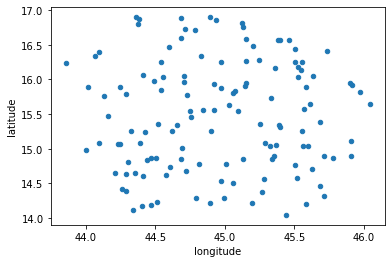

In [43]:
df_dict[1].plot(kind='scatter', x='longitude', y='latitude')

In [48]:
for grupo, df in df_dict.items():
    df.to_excel(f'../inputs/df_{grupo}.xlsx', index=False)

In [ ]:
# df_fazendas['localizacao'] = df_fazendas.apply(lambda x: np.array([x['latitude'], x['longitude']]), axis=1)
# np.linalg.norm(df_fazendas.loc[0, 'localizacao'] - df_fazendas.loc[3, 'localizacao'])